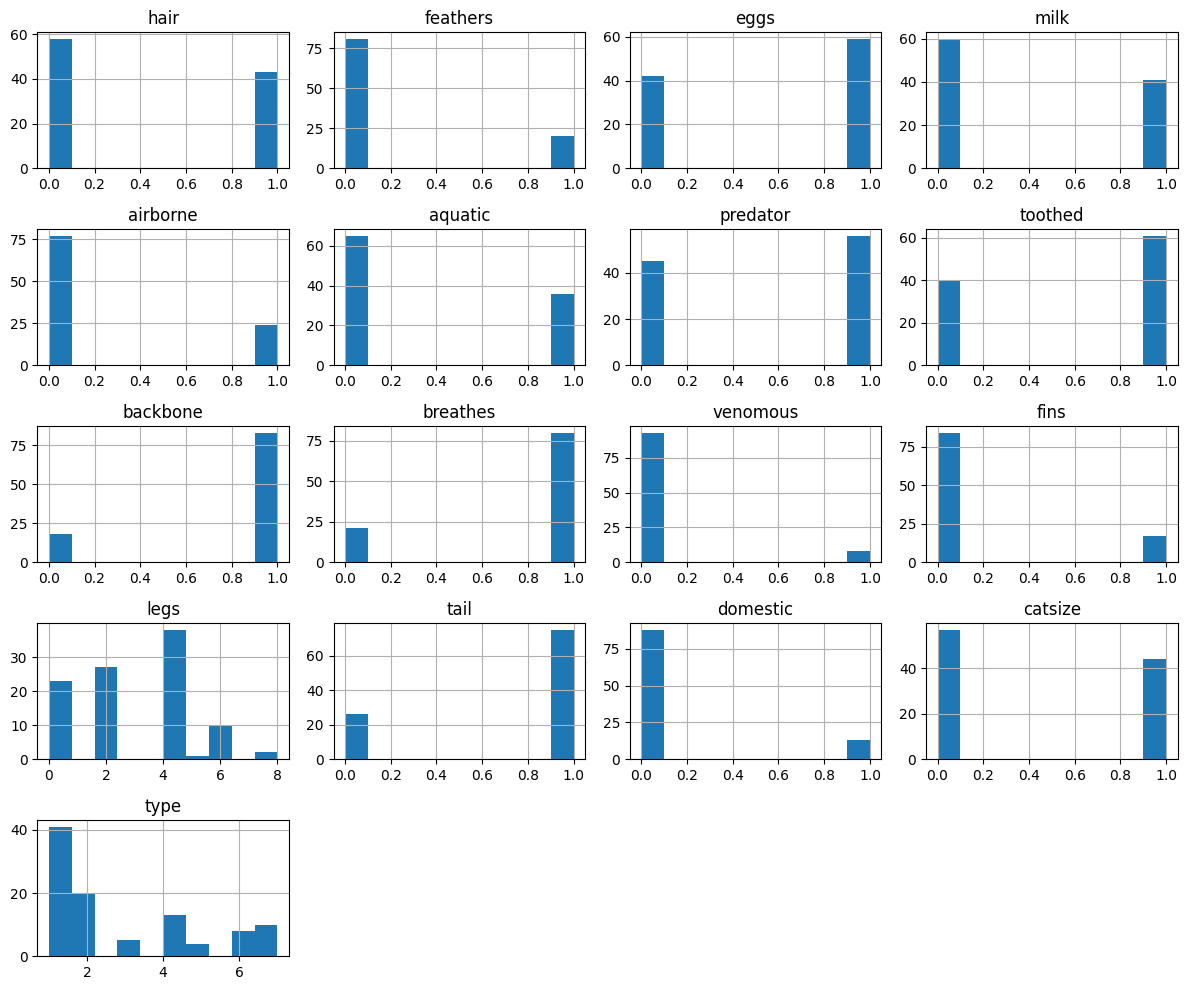

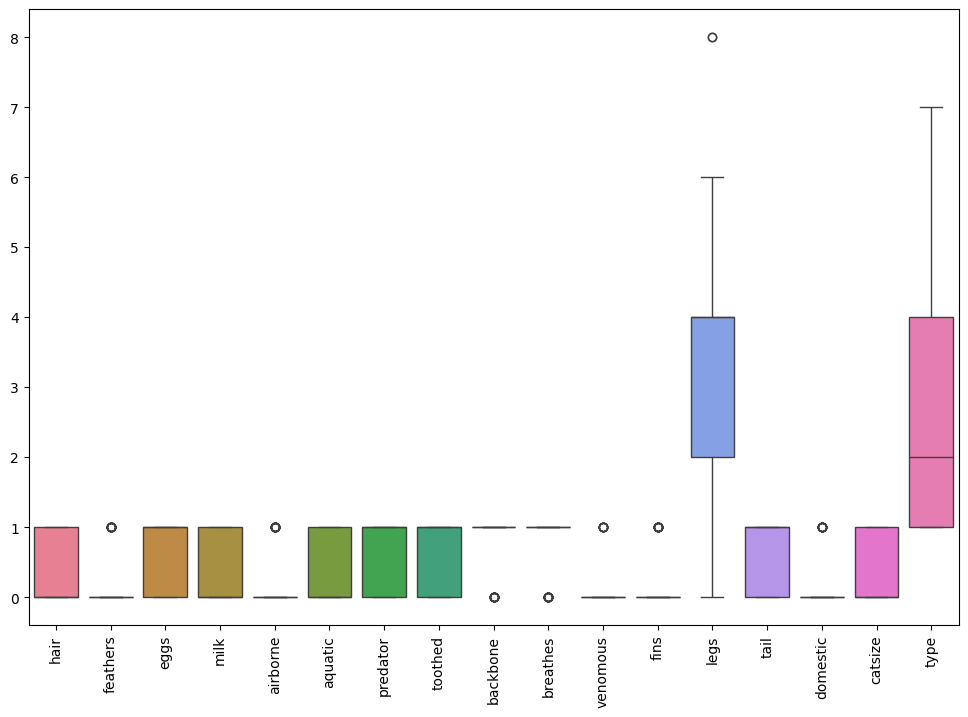

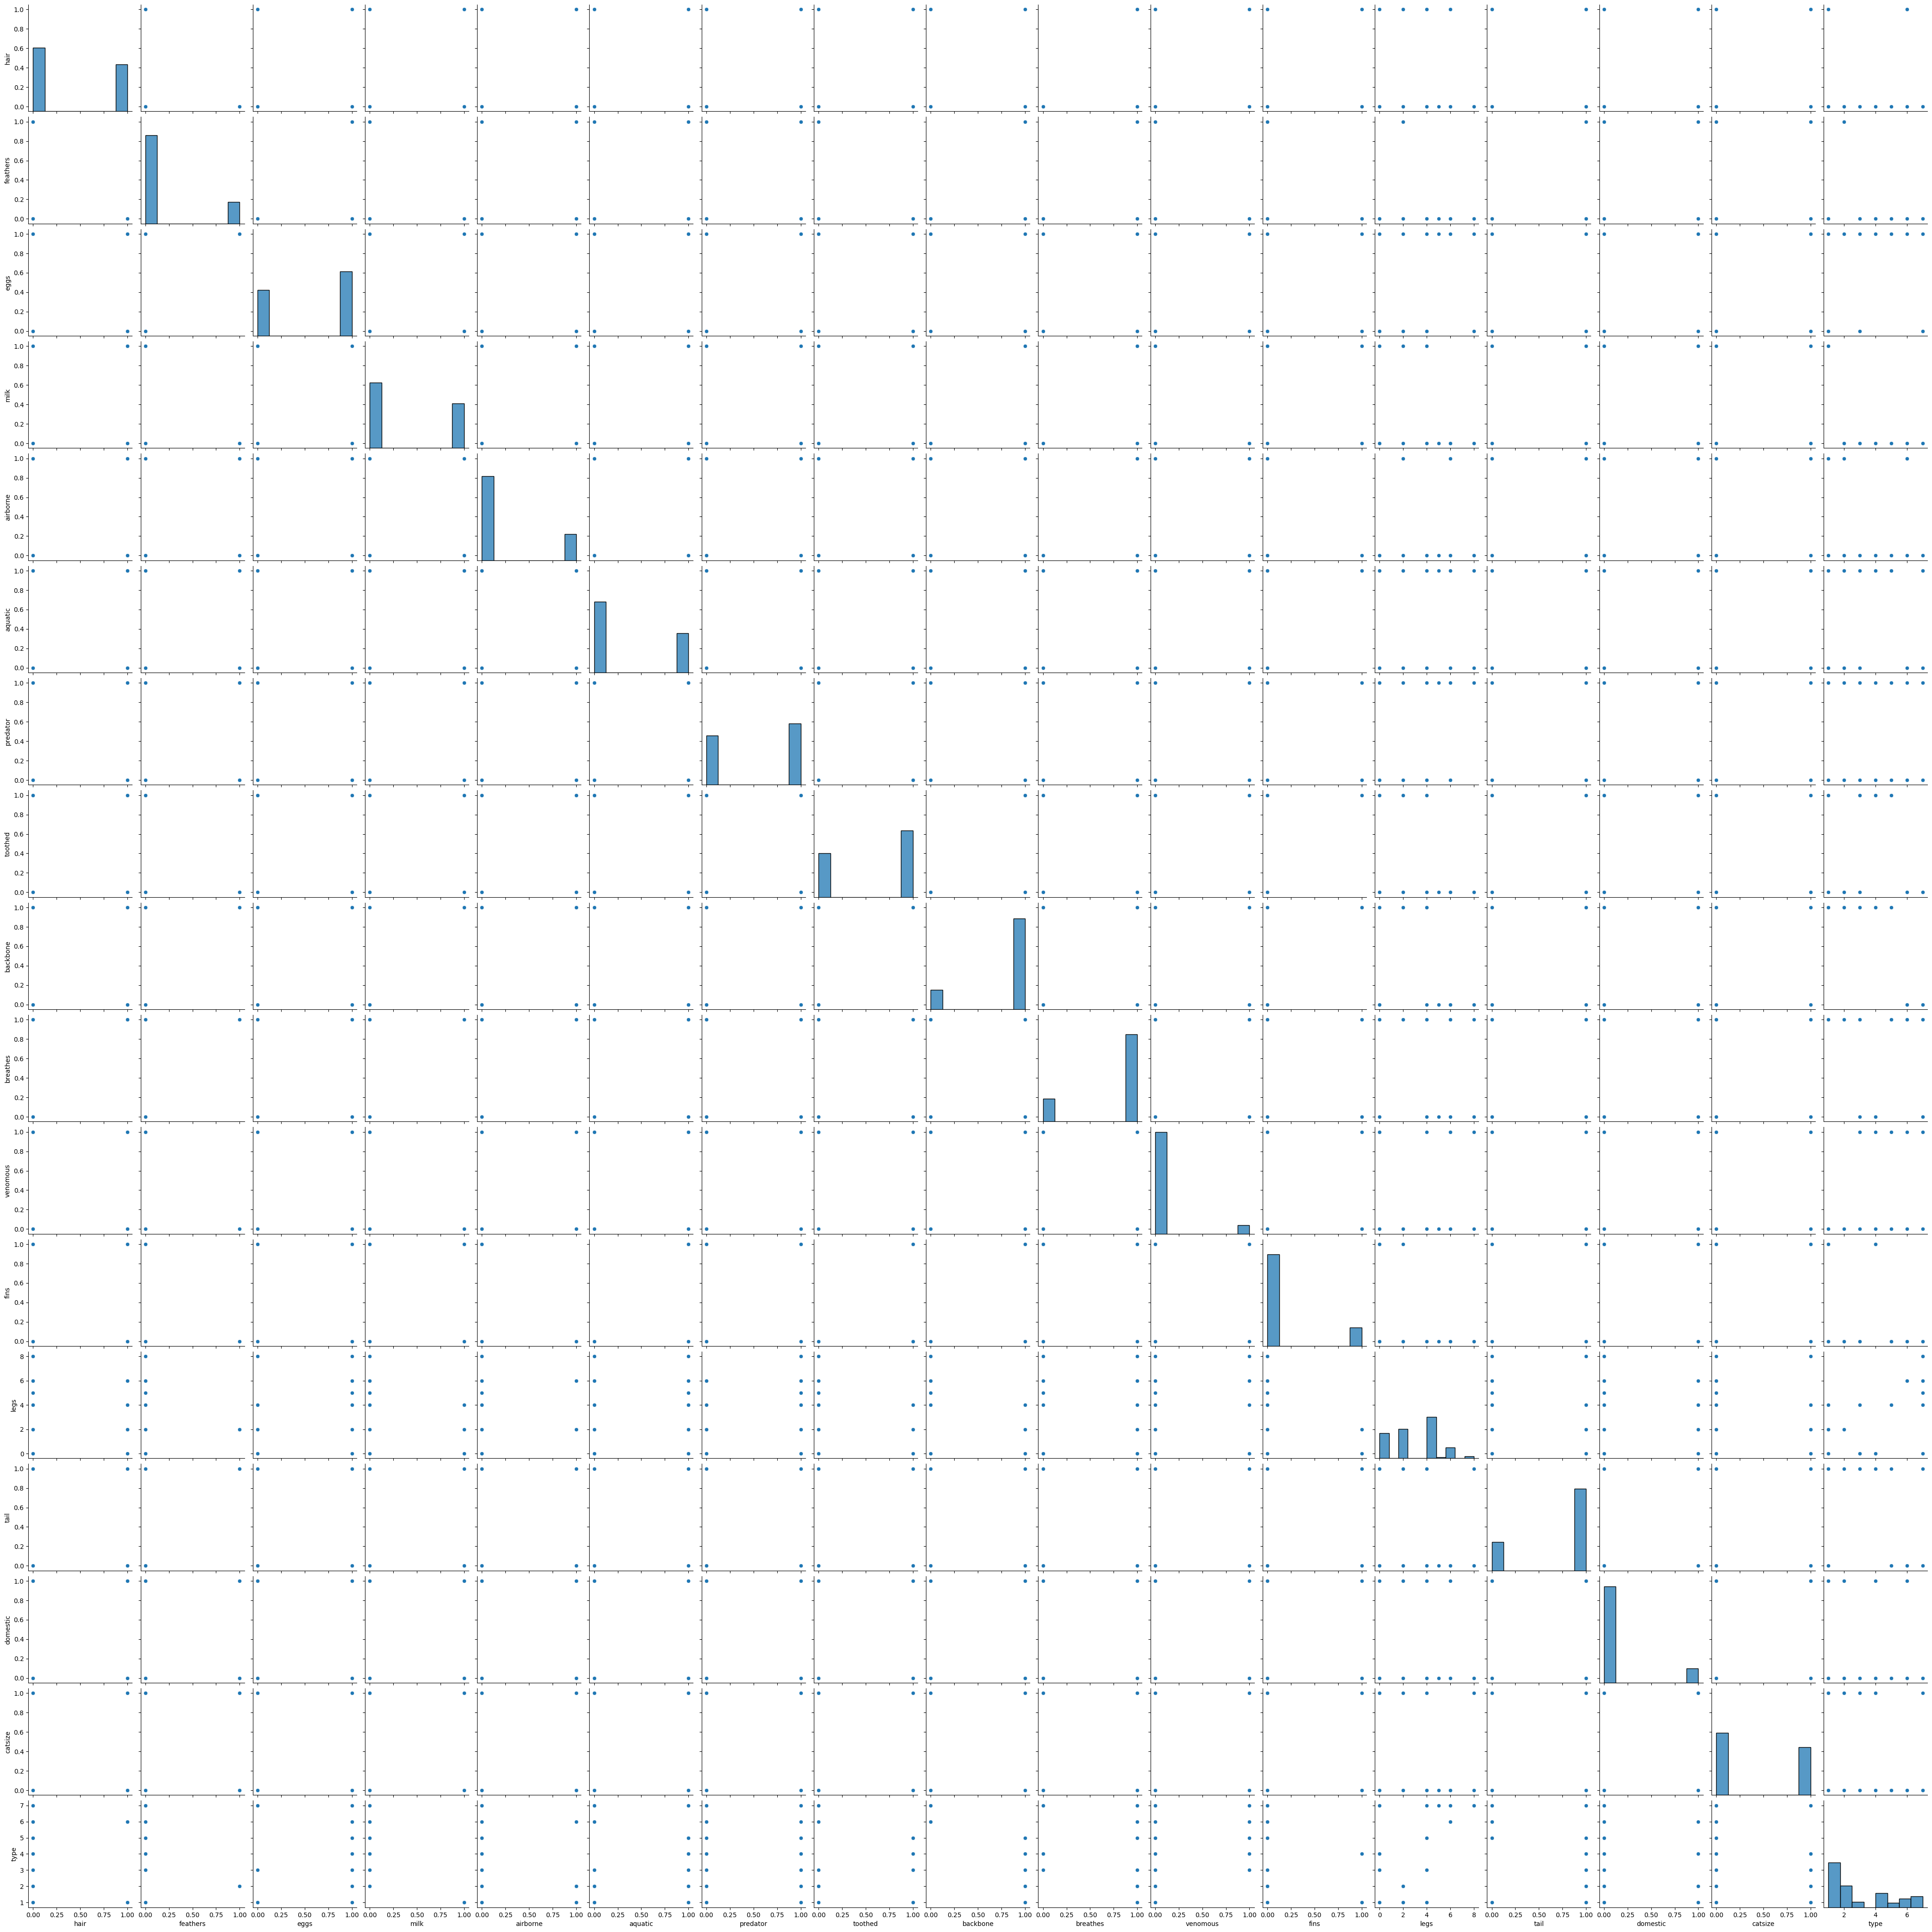

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # import pandas to work with dataframes

# Load your dataset - replace 'your_file.csv' with your actual file path
df = pd.read_csv('/content/Zoo.csv') # define df by reading your data

# Now you can proceed with your visualization code
# Histograms for numerical features
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Box plots to detect any outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# Pair plot to examine relationships between features
sns.pairplot(df)
plt.show()


In [ ]:
import pandas as pd
import numpy as np

# Load the dataset (replace with your actual dataset file path)
df = pd.read_csv('/content/Zoo.csv')

# Display basic information about the dataset
print(df.info())

# Display the first few rows to understand the data structure
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB
None
  animal name  hai

In [ ]:
# Check for missing values
print(df.isnull().sum())

# Select only numerical columns for imputation
numerical_cols = df.select_dtypes(include=np.number).columns

# Impute missing values with mean for numerical columns only
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())


animal name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
type           0
dtype: int64


In [ ]:
# Check for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns

# One-hot encode categorical variables (if any)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Replace 'target_column' with the actual target column name from your dataset
target_column_name = 'type'  # Example: Assuming 'type' is the target column

# Separate features and target variable
X = df.drop(columns=[target_column_name])
y = df[target_column_name]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the KNN classifier with the chosen value for K (e.g., 3)
knn_model = KNeighborsClassifier(n_neighbors=3, metric='euclidean')

# Train the model on the training set
knn_model.fit(X_train, y_train)


KNeighborsClassifier(metric='euclidean', n_neighbors=3)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklea

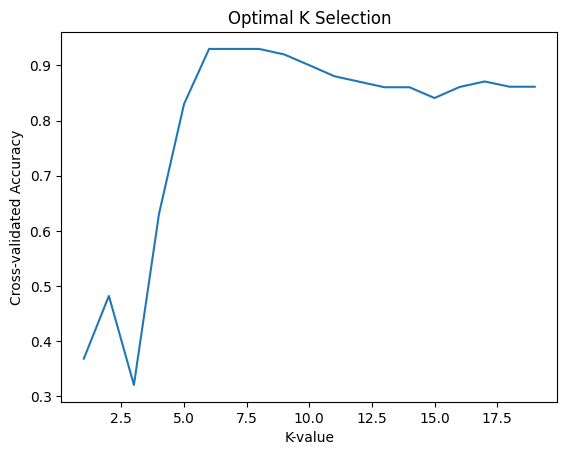

Best K value: 7


In [ ]:
from sklearn.model_selection import cross_val_score

# Use cross-validation to choose the optimal K
k_values = range(1, 20)
cv_scores = []

for k in k_values:
    model = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

# Plot the cross-validation scores to select the best K
plt.plot(k_values, cv_scores)
plt.xlabel('K-value')
plt.ylabel('Cross-validated Accuracy')
plt.title('Optimal K Selection')
plt.show()

# Best K
best_k = k_values[np.argmax(cv_scores)]
print(f"Best K value: {best_k}")


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Predict on the test set
y_pred = knn_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)


Accuracy: 0.05
Precision: 0.57
Recall: 0.05
F1-Score: 0.09
Confusion Matrix:
 [[ 1  0  0  0 11  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  2  0  0]
 [ 0  0  0  0  0  0  0]
 [ 0  0  0  0  3  0  0]
 [ 0  0  0  0  1  0  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


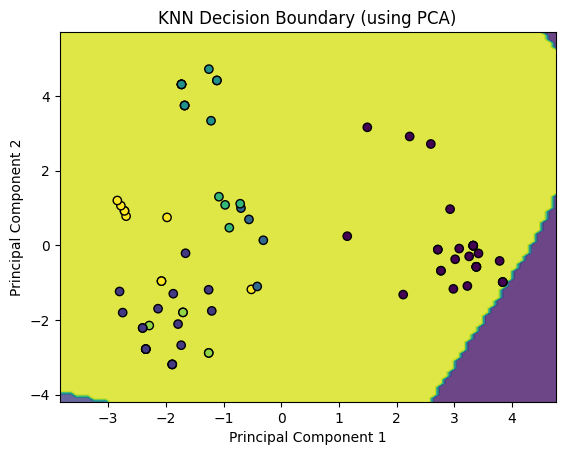

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assuming X_train, y_train, and knn_model are already defined

# Apply PCA to reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

# Create a meshgrid for the 2 principal components
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Predict using the meshgrid points transformed by PCA
Z = knn_model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, edgecolors='k')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('KNN Decision Boundary (using PCA)')
plt.show()

### 1. What are the key hyperparameters in KNN?  
The key hyperparameters in KNN include \(k\), which determines how many data points are considered when making predictions a smaller \(k\) can lead to overfitting, while a larger \(k\) may cause underfitting. The distance metric is another important hyperparameter, defining how distances are calculated, with common options being Euclidean, Manhattan, or Minkowski. Additionally, the weighting scheme can be uniform (where all neighbors have equal influence) or distance-based (where closer neighbors have more impact). Lastly, the algorithm used for finding neighbors, such as Ball Tree, KD Tree, or brute force, also plays a role in the model’s efficiency.

### 2. What distance metrics can be used in KNN?  
KNN can use various distance metrics depending on the data type and application. Euclidean distance, which measures straight-line distance, is widely used for continuous data. Manhattan distance, which sums the absolute differences along each axis, is effective for grid-like data. Minkowski distance generalizes both Euclidean and Manhattan by varying the \(p\)-parameter. Cosine similarity, which measures the angle between vectors, is ideal for high-dimensional or text data, while Hamming distance is best suited for categorical or binary data by counting differences between points.